In [1]:
import pandas as pd

In [2]:
df_t_basics = pd.read_csv("./imdb/title.basics.tsv",'\t')
df_t_basics.head()

C:\Users\SushX\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\SushX\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
print(df_t_basics.shape)
df_t_basics.drop_duplicates()
print(df_t_basics.shape)

(8824341, 9)
(8824341, 9)


In [4]:
df_t_basics['titleType'].value_counts()

tvEpisode       6616225
short            863404
movie            606395
video            258969
tvSeries         223071
tvMovie          135614
tvMiniSeries      42849
tvSpecial         36476
videoGame         30824
tvShort           10512
tvPilot               2
Name: titleType, dtype: int64

### Top types of titles are
- tvEpisodes
- short
- movie
- video
- tvMovie

In [5]:
df_short = df_t_basics[df_t_basics['titleType']=='short']
df_short_runtime=df_short[df_short['runtimeMinutes'] != '\\N'][['tconst','runtimeMinutes']]
df_short_runtime['runtimeMinutes']=df_short_runtime['runtimeMinutes'].astype(int)
df_short_runtime['runtimeMinutes'].quantile(0.95)

30.0

### 95% of shorts last less than 30 minutes.
Maybe we don't want them to be recommended for our Middle-of-NoWhere cinema

In [6]:
df_short = df_t_basics[df_t_basics['titleType']=='video']
df_short_runtime=df_short[df_short['runtimeMinutes'] != '\\N'][['tconst','runtimeMinutes']]
df_short_runtime['runtimeMinutes']=df_short_runtime['runtimeMinutes'].astype(int)
print('33% less than ',df_short_runtime['runtimeMinutes'].quantile(0.33))
print('50% less than ',df_short_runtime['runtimeMinutes'].quantile(0.5))

33% less than  21.0
50% less than  60.0


### 50% of videos last less than 60 minutes.
Maybe we don't want them to be recommended for our Middle-of-NoWhere cinema

In [7]:
df_short = df_t_basics[df_t_basics['titleType']=='tvMovie']
df_short_runtime=df_short[df_short['runtimeMinutes'] != '\\N'][['tconst','runtimeMinutes']]
df_short_runtime['runtimeMinutes']=df_short_runtime['runtimeMinutes'].astype(int)
print('10% less than ',df_short_runtime['runtimeMinutes'].quantile(0.10))
print('25% less than ',df_short_runtime['runtimeMinutes'].quantile(0.25))

10% less than  30.0
25% less than  48.0


### 75% of tvMovies last more than 48 minutes.
Maybe we would want to recommend some for our Middle-of-NoWhere cinema

In [8]:
df_t_principals = pd.read_csv("./imdb/title.principals.tsv",'\t')
df_t_principals.head()

C:\Users\SushX\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [9]:
print(df_t_principals.shape)
df_t_principals.drop_duplicates(inplace=True)
print(df_t_principals.shape)

(49736924, 6)
(49736924, 6)


In [10]:
df_t_principals[(df_t_principals['category']=='actor') | (df_t_principals['category']=='actress')]['job'].value_counts()

\N    19550706
Name: job, dtype: int64

In [11]:
df_actors = df_t_principals[(df_t_principals['category']=='actor') | (df_t_principals['category']=='actress')]
df_actors

,tconst,ordering,nconst,category,job,characters
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
16,tt0000007,1,nm0179163,actor,\N,\N
17,tt0000007,2,nm0183947,actor,\N,\N
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"
...,...,...,...,...,...,...
49736911,tt9916856,4,nm10538647,actress,\N,"[""Kathi""]"
49736916,tt9916880,1,nm1483166,actor,\N,"[""Rude Ralph"",""Mischievous Mike"",""Jolly Josh""]"
49736917,tt9916880,2,nm0254176,actress,\N,"[""Moody Margaret""]"
49736918,tt9916880,3,nm0286175,actor,\N,"[""Dad"",""Aerobic Al"",""Nasty Nicola""]"


In [12]:
df_merge_actors = df_actors.merge(df_t_basics[['tconst','titleType','originalTitle']], how="left", on="tconst")
df_merge_actors.head()

,tconst,ordering,nconst,category,job,characters,titleType,originalTitle
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",short,Blacksmith Scene
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",short,Blacksmith Scene
2,tt0000007,1,nm0179163,actor,\N,\N,short,Corbett and Courtney Before the Kinetograph
3,tt0000007,2,nm0183947,actor,\N,\N,short,Corbett and Courtney Before the Kinetograph
4,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]",short,Edison Kinetoscopic Record of a Sneeze


In [13]:
df_most_present_actors = df_merge_actors.groupby(['titleType','nconst'])['tconst'].count().reset_index().sort_values(['titleType','tconst'], ascending=[True,False])
df_most_present_actors.head()

,titleType,nconst,tconst
23521,movie,nm0103977,797
116093,movie,nm0648803,563
3320,movie,nm0006982,561
59865,movie,nm0305182,511
125046,movie,nm0706691,471


In [15]:
df_n_basics = pd.read_csv("./imdb/name.basics.tsv",'\t')
df_n_basics.head()

C:\Users\SushX\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0078723,tt0080455,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0060827"


In [21]:
df_merge_names = df_most_present_actors.merge(df_n_basics[['nconst','primaryName']], how="left", on="nconst")
df_merge_names.head()

,titleType,nconst,tconst,primaryName
0,movie,nm0103977,797,Brahmanandam
1,movie,nm0648803,563,Matsunosuke Onoe
2,movie,nm0006982,561,Adoor Bhasi
3,movie,nm0305182,511,Eddie Garcia
4,movie,nm0706691,471,Sultan Rahi


In [40]:
df_mpa_short = df_merge_names[(df_most_present_actors['titleType'] == 'short')]
df_mpa_movie = df_merge_names[(df_most_present_actors['titleType'] == 'movie')]
df_mpa_tvEpisode = df_merge_names[(df_most_present_actors['titleType'] == 'tvEpisode')]
df_mpa_video = df_merge_names[(df_most_present_actors['titleType'] == 'video')]
df_mpa_tvMovie = df_merge_names[(df_most_present_actors['titleType'] == 'tvMovie')]

C:\Users\SushX\AppData\Local\Temp/ipykernel_6980/2979497097.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mpa_short = df_merge_names[(df_most_present_actors['titleType'] == 'short')]
C:\Users\SushX\AppData\Local\Temp/ipykernel_6980/2979497097.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mpa_movie = df_merge_names[(df_most_present_actors['titleType'] == 'movie')]
C:\Users\SushX\AppData\Local\Temp/ipykernel_6980/2979497097.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mpa_tvEpisode = df_merge_names[(df_most_present_actors['titleType'] == 'tvEpisode')]
C:\Users\SushX\AppData\Local\Temp/ipykernel_6980/2979497097.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mpa_video = df_merge_names[(df_most_present_actors['titleType'] == 'video')]
C:\Users\SushX\AppData\Local\Temp/ipykernel_6980/2979497097.py:5: UserWarning: Boolean Series ke

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

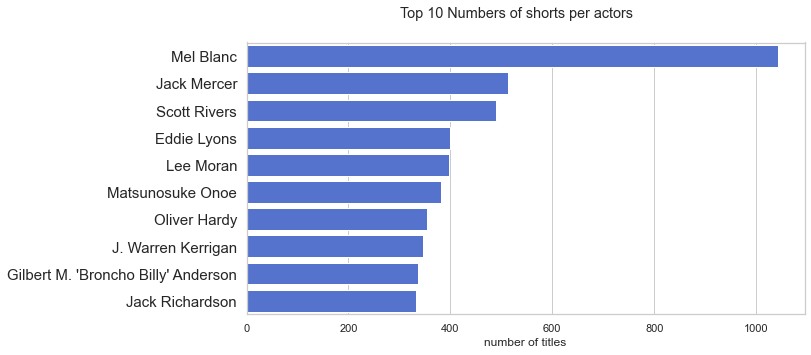

In [35]:
fig, axs = plt.subplots(1, figsize=(10,5))
axs = sns.barplot(data=df_mpa_short[:10],y='primaryName', x="tconst", color='royalblue')
axs.set_xlabel('number of titles')
axs.set_ylabel('')
plt.xticks(rotation=0)
plt.yticks(fontsize=15)
plt.suptitle('Top 10 Numbers of shorts per actors')
sns.set_style("whitegrid")
plt.show()

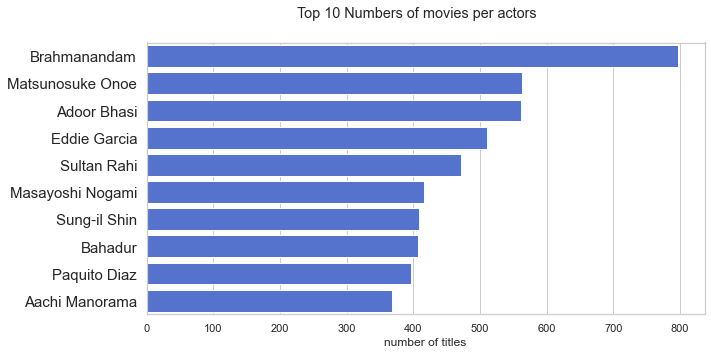

In [36]:
fig, axs = plt.subplots(1, figsize=(10,5))
axs = sns.barplot(data=df_mpa_movie[:10],y='primaryName', x="tconst", color='royalblue')
axs.set_xlabel('number of titles')
axs.set_ylabel('')
plt.xticks(rotation=0)
plt.yticks(fontsize=15)
plt.suptitle('Top 10 Numbers of movies per actors')
sns.set_style("whitegrid")
plt.show()

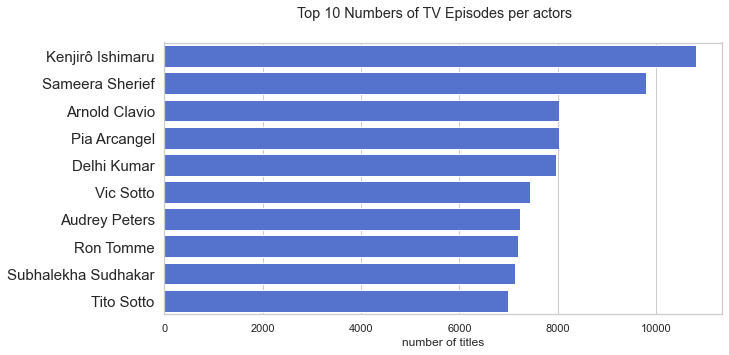

In [37]:
fig, axs = plt.subplots(1, figsize=(10,5))
axs = sns.barplot(data=df_mpa_tvEpisode[:10],y='primaryName', x="tconst", color='royalblue')
axs.set_xlabel('number of titles')
axs.set_ylabel('')
plt.xticks(rotation=0)
plt.yticks(fontsize=15)
plt.suptitle('Top 10 Numbers of TV Episodes per actors')
sns.set_style("whitegrid")
plt.show()

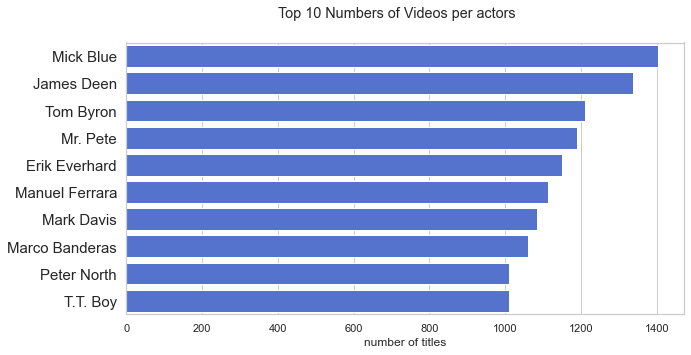

In [39]:
fig, axs = plt.subplots(1, figsize=(10,5))
axs = sns.barplot(data=df_mpa_video[:10],y='primaryName', x="tconst", color='royalblue')
axs.set_xlabel('number of titles')
axs.set_ylabel('')
plt.xticks(rotation=0)
plt.yticks(fontsize=15)
plt.suptitle('Top 10 Numbers of Videos per actors')
sns.set_style("whitegrid")
plt.show()

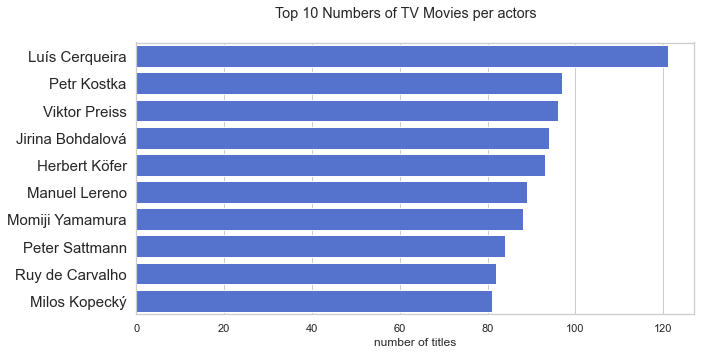

In [41]:
fig, axs = plt.subplots(1, figsize=(10,5))
axs = sns.barplot(data=df_mpa_tvMovie[:10],y='primaryName', x="tconst", color='royalblue')
axs.set_xlabel('number of titles')
axs.set_ylabel('')
plt.xticks(rotation=0)
plt.yticks(fontsize=15)
plt.suptitle('Top 10 Numbers of TV Movies per actors')
sns.set_style("whitegrid")
plt.show()